In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
import Orange
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare
from scipy.stats import rankdata
import numpy as np
import pandas as pd

os.chdir(Path(os.getcwd()).resolve().parents[0])

In [2]:
accMatrix = pd.read_csv('results\\accuracies.csv',sep=';', 
                        header=0, index_col=0)
display(accMatrix)

,STC,SLD,INC,A-FCP,A-DCP-HELL,A-DCP-HELL2,A-DCP-BBD -1,A-DCP-BBD2,A-DCP-BBD3,A-DCP-BBD10
1CSurr,64.114600,89.293200,64.078400,95.57020,87.506100,86.214900,86.112000,85.847900,85.845399,86.009200
5CVT,45.780000,34.275599,45.218200,41.11880,39.262999,24.263400,24.359900,29.776199,52.539799,47.644900
4CE1CF,98.440599,88.240500,98.789300,98.14810,97.978000,97.626290,97.980000,97.900699,97.900700,97.900700
4CR,21.173000,99.975100,21.116000,99.98220,99.983700,99.986700,99.985100,99.982200,99.983600,99.984300
4CRE-V1,23.063300,22.153099,22.168800,24.21500,23.682699,22.829799,27.175100,15.912400,18.837900,21.045500
4CRE-V2,20.438400,17.032900,20.119500,16.05650,21.906000,18.220400,28.263900,18.554700,25.066800,19.513100
1CDT,99.314300,99.749900,99.577800,99.98020,99.927500,99.960400,99.953800,99.960400,99.947200,99.947200
1CHT,95.591500,99.473300,96.644600,99.67089,99.440800,99.651100,99.591999,99.651199,99.565700,99.598600
CHECKERBOARD,49.024200,49.162400,49.003100,49.65990,50.266500,50.028799,50.157900,50.029100,50.251200,50.282399
FG-2C-2D,81.545900,91.047400,82.172800,94.96490,82.730700,78.423000,80.809600,82.523900,61.072900,80.227800


<h1>Teste de Friedman</h1>
<p>Aqui realizamos o teste de Friedman para checar se os modelos testados são significativamente diferentes. Foi escolhido um nível de significância (alpha) de 0.05, ou seja,nível de confiança de 95%.</p>
<p>A hipótese nula é</p>
<p>H0: Os modelos testados não são estatisticamente distintos.</p>

In [3]:
chisquared, p = friedmanchisquare(*[np.multiply(accMatrix.values[:,j],-1) for j in range(accMatrix.shape[1])])

print("Chi Squared:{} \np-value: {}\n".format(chisquared, p))

alpha = 0.05
if p > alpha:
    print('As distribuções são as mesmas (Falha para rejeitar H0)')
else:
    print('As distribuições são diferentes (Rejeitada H0)')

Chi Squared:19.518270401948914 
p-value: 0.021129545872123852

As distribuições são diferentes (Rejeitada H0)


<h1>Teste post-hoc de Nemenyi</h1>
<p>Uma vez que o Teste de Friedman teve a hipótese nula rejeitada, é possível seguir para o teste post-hoc de Nemenyi para checar quais dos métodos testados são significativamente diferentes</p>

In [4]:
# Construir matriz de ranks
ranked = np.zeros_like(accMatrix).astype(float)
for i in range(accMatrix.shape[0]):
    ranked[i,:] = rankdata(np.multiply(accMatrix.values[i,:],-1), method='average')

display(pd.DataFrame(ranked, index=accMatrix.index, columns=accMatrix.columns))    

,STC,SLD,INC,A-FCP,A-DCP-HELL,A-DCP-HELL2,A-DCP-BBD -1,A-DCP-BBD2,A-DCP-BBD3,A-DCP-BBD10
1CSurr,9.0,2.0,10.0,1.0,3.0,4.0,5.0,7.0,8.0,6.0
5CVT,3.0,7.0,4.0,5.0,6.0,10.0,9.0,8.0,1.0,2.0
4CE1CF,2.0,10.0,1.0,3.0,5.0,9.0,4.0,8.0,6.5,6.5
4CR,9.0,8.0,10.0,6.5,4.0,1.0,2.0,6.5,5.0,3.0
4CRE-V1,4.0,7.0,6.0,2.0,3.0,5.0,1.0,10.0,9.0,8.0
4CRE-V2,4.0,9.0,5.0,10.0,3.0,8.0,1.0,7.0,2.0,6.0
1CDT,10.0,8.0,9.0,1.0,7.0,2.5,4.0,2.5,5.5,5.5
1CHT,10.0,7.0,9.0,1.0,8.0,3.0,5.0,2.0,6.0,4.0
CHECKERBOARD,9.0,8.0,10.0,7.0,2.0,6.0,4.0,5.0,3.0,1.0
FG-2C-2D,6.0,2.0,5.0,1.0,3.0,9.0,7.0,4.0,10.0,8.0


In [5]:
# Média dos ranks    
avranks = ranked.mean(axis=0)
display(pd.Series(avranks, index=accMatrix.columns).sort_values(ascending=True))

A-FCP           4.525
A-DCP-HELL2     4.650
A-DCP-BBD -1    4.775
A-DCP-BBD3      4.775
A-DCP-BBD2      5.050
A-DCP-BBD10     5.050
A-DCP-HELL      5.525
SLD             6.750
STC             6.900
INC             7.000
dtype: float64

Diferença Crítica: 2.7955808802395463


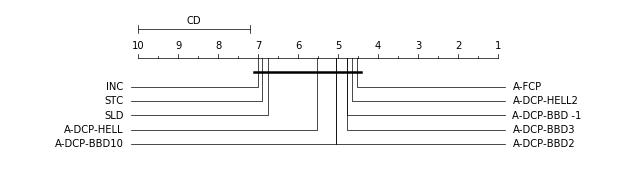

In [24]:
names = accMatrix.columns
cd = Orange.evaluation.compute_CD(avranks, n=20, alpha='0.1') #tested on 20 datasets
print("Diferença Crítica: {}".format(cd))
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=8, textspace=1.5, reverse=True)
plt.show()

<h1>Testes sem alguns datasets e métodos</h1>

In [4]:
accMatrix = accMatrix.drop(columns=['A-DCP-BBD -1', 'A-DCP-BBD2','A-DCP-BBD10'])

# Construir matriz de ranks
ranked = np.zeros_like(accMatrix).astype(float)
for i in range(accMatrix.shape[0]):
    ranked[i,:] = rankdata(np.multiply(accMatrix.values[i,:],-1), method='average')

display(pd.DataFrame(ranked, index=accMatrix.index, columns=accMatrix.columns))    

,STC,SLD,INC,A-FCP,A-DCP-HELL,A-DCP-HELL2,A-DCP-BBD3
1CSurr,6.0,2.0,7.0,1.0,3.0,4.0,5.0
5CVT,2.0,6.0,3.0,4.0,5.0,7.0,1.0
4CE1CF,2.0,7.0,1.0,3.0,4.0,6.0,5.0
4CR,6.0,5.0,7.0,4.0,2.0,1.0,3.0
4CRE-V1,3.0,6.0,5.0,1.0,2.0,4.0,7.0
4CRE-V2,3.0,6.0,4.0,7.0,2.0,5.0,1.0
1CDT,7.0,5.0,6.0,1.0,4.0,2.0,3.0
1CHT,7.0,4.0,6.0,1.0,5.0,2.0,3.0
CHECKERBOARD,6.0,5.0,7.0,4.0,1.0,3.0,2.0
FG-2C-2D,5.0,2.0,4.0,1.0,3.0,6.0,7.0


In [5]:
chisquared, p = friedmanchisquare(*[np.multiply(accMatrix.values[:,j],-1) for j in range(accMatrix.shape[1])])

print("Chi Squared:{} \np-value: {}\n".format(chisquared, p))

alpha = 0.05
if p > alpha:
    print('As distribuções são as mesmas (Falha para rejeitar H0)')
else:
    print('As distribuições são diferentes (Rejeitada H0)')

Chi Squared:15.715817694369992 
p-value: 0.015363354287452287

As distribuições são diferentes (Rejeitada H0)


In [6]:
# Média dos ranks    
avranks = ranked.mean(axis=0)
display(pd.Series(avranks, index=accMatrix.columns).sort_values(ascending=True))

A-FCP          3.150
A-DCP-BBD3     3.200
A-DCP-HELL2    3.425
A-DCP-HELL     3.825
SLD            4.700
STC            4.800
INC            4.900
dtype: float64

Diferença Crítica: 2.0140859921529333


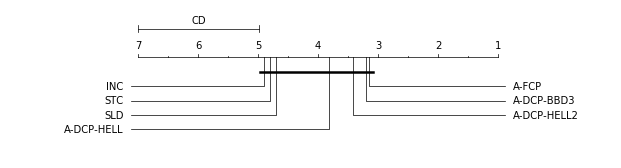

In [7]:
names = accMatrix.columns
cd = Orange.evaluation.compute_CD(avranks, n=20, alpha='0.05') #tested on 19 datasets
print("Diferença Crítica: {}".format(cd))
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=8, textspace=1.5, reverse=True)
plt.show()

<h1>Teste somente nos métodos dinâmicos</h1>

In [10]:
accMatrix = accMatrix.drop(columns=['STC', 'SLD', 'INC', 'A-FCP','A-DCP-BBD3', 'A-DCP-BBD10'])
#index=['Electricity', 'NOAA']
display(accMatrix)

,A-DCP-HELL,A-DCP-HELL2,A-DCP-BBD -1,A-DCP-BBD2
1CSurr,87.506100,86.214900,86.112000,85.847900
5CVT,39.262999,24.263400,24.359900,29.776199
4CE1CF,97.978000,97.626290,97.980000,97.900699
4CR,99.983700,99.986700,99.985100,99.982200
4CRE-V1,23.682699,22.829799,27.175100,15.912400
4CRE-V2,21.906000,18.220400,28.263900,18.554700
1CDT,99.927500,99.960400,99.953800,99.960400
1CHT,99.440800,99.651100,99.591999,99.651199
CHECKERBOARD,50.266500,50.028799,50.157900,50.029100
FG-2C-2D,82.730700,78.423000,80.809600,82.523900


In [11]:
chisquared, p = friedmanchisquare(*[np.multiply(accMatrix.values[:,j],-1) for j in range(accMatrix.shape[1])])

print("Chi Squared:{} \np-value: {}\n".format(chisquared, p))

alpha = 0.05
if p > alpha:
    print('As distribuções são as mesmas (Falha para rejeitar H0)')
else:
    print('As distribuições são diferentes (Rejeitada H0)')

Chi Squared:1.2030456852791902 
p-value: 0.7522739235732745

As distribuções são as mesmas (Falha para rejeitar H0)


In [12]:
# Construir matriz de ranks
ranked = np.zeros_like(accMatrix).astype(float)
for i in range(accMatrix.shape[0]):
    ranked[i,:] = rankdata(np.multiply(accMatrix.values[i,:],-1), method='average')

display(pd.DataFrame(ranked, index=accMatrix.index, columns=accMatrix.columns))   

,A-DCP-HELL,A-DCP-HELL2,A-DCP-BBD -1,A-DCP-BBD2
1CSurr,1.0,2.0,3.0,4.0
5CVT,1.0,4.0,3.0,2.0
4CE1CF,2.0,4.0,1.0,3.0
4CR,3.0,1.0,2.0,4.0
4CRE-V1,2.0,3.0,1.0,4.0
4CRE-V2,2.0,4.0,1.0,3.0
1CDT,4.0,1.5,3.0,1.5
1CHT,4.0,2.0,3.0,1.0
CHECKERBOARD,1.0,4.0,2.0,3.0
FG-2C-2D,1.0,4.0,3.0,2.0


In [14]:
avranks = ranked.mean(axis=0)
display(pd.Series(avranks, index=accMatrix.columns).sort_values(ascending=True))

A-DCP-HELL2     2.300
A-DCP-BBD -1    2.425
A-DCP-BBD2      2.550
A-DCP-HELL      2.725
dtype: float64